Упражнение 2.2

In [27]:
from thinkdsp import Sinusoid
from thinkdsp import SquareSignal
from thinkdsp import TriangleSignal
from thinkdsp import normalize, unbias
from thinkdsp import decorate
import numpy as np

In [28]:
class MySawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Спектр пилообразного сигнала:

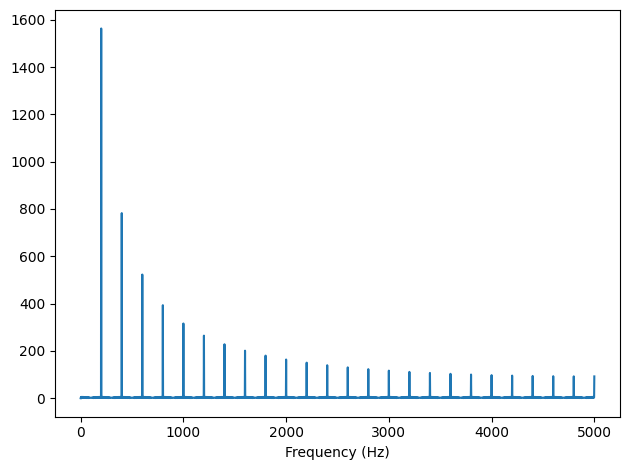

In [29]:
signalSaw = MySawtoothSignal(200)
waveSaw = signalSaw.make_wave(duration=0.5, framerate=10000)
spectrumSaw = waveSaw.make_spectrum()
spectrumSaw.plot()
decorate(xlabel='Frequency (Hz)')

Спектр треугольного сигнала:

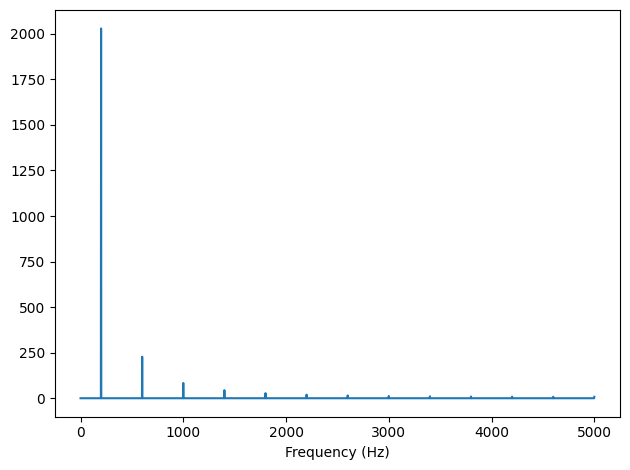

In [30]:
signalTriangle = TriangleSignal(200)
waveTriangle = signalTriangle.make_wave(duration=0.5, framerate=10000)
spectrumTriangle = waveTriangle.make_spectrum()
spectrumTriangle.plot()
decorate(xlabel='Frequency (Hz)')

Спектр прямоугольного сигнала:

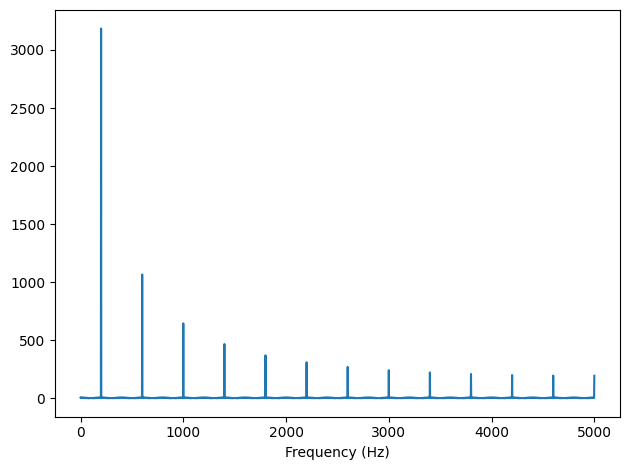

In [31]:
signalSquare = SquareSignal(200)
waveSquare = signalSquare.make_wave(duration=0.5, framerate=10000)
spectrumSquare = waveSquare.make_spectrum()
spectrumSquare.plot()
decorate(xlabel='Frequency (Hz)')

По полученным гармоническим структурам можно сделать следующие выводы:

Гармоническая структура пилообразного сигнала в отличие от тругольного и прямоугольного сигнала имеет как четные, так и нечетные гармоники, кратные основной частоте.

Амплитуда гармоник пилообразного сигнала спадает пропорционально частоте, как и в случае прямоугольного сигнала.

Упражнение 2.3

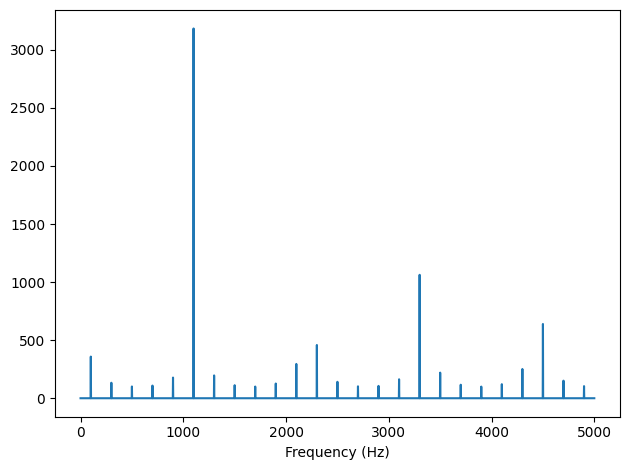

In [32]:
signalSquare2 = SquareSignal(1100)
waveSquare2 = signalSquare2.make_wave(duration=0.5, framerate=10000)
spectrumSquare2 = waveSquare2.make_spectrum()
spectrumSquare2.plot()
decorate(xlabel='Frequency (Hz)')
waveSquare2.normalize()
waveSquare2.apodize()
waveSquare2.make_audio()

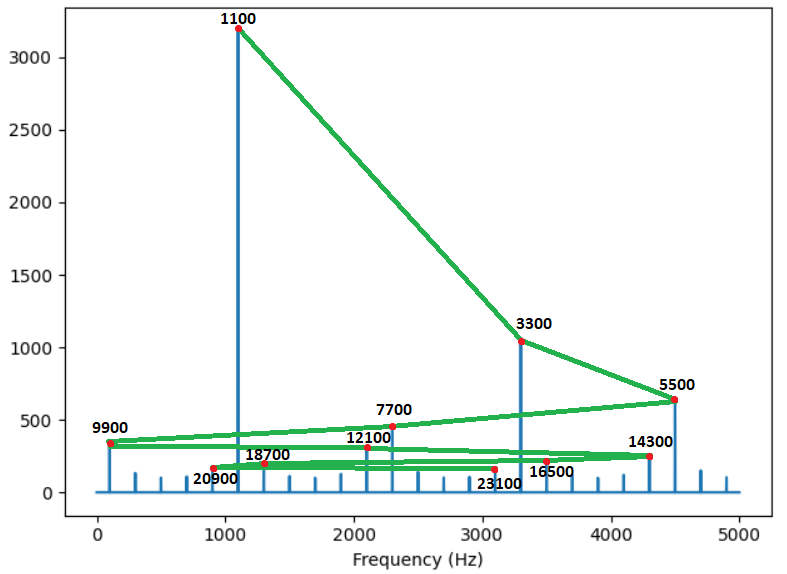

Если проделать то же самое с сигналом, имеющим частоту выборки 100000, получим следующий результат:

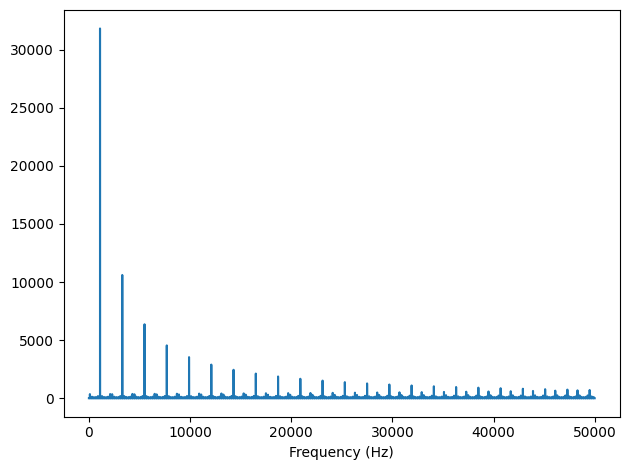

In [33]:
waveSquare2Clear = signalSquare2.make_wave(duration=0.5, framerate=100000)
spectrumSquare2Clear = waveSquare2Clear.make_spectrum()
spectrumSquare2Clear.plot()
decorate(xlabel='Frequency (Hz)')
waveSquare2Clear.normalize()
waveSquare2Clear.apodize()
waveSquare2Clear.make_audio()

Упражнение 2.4

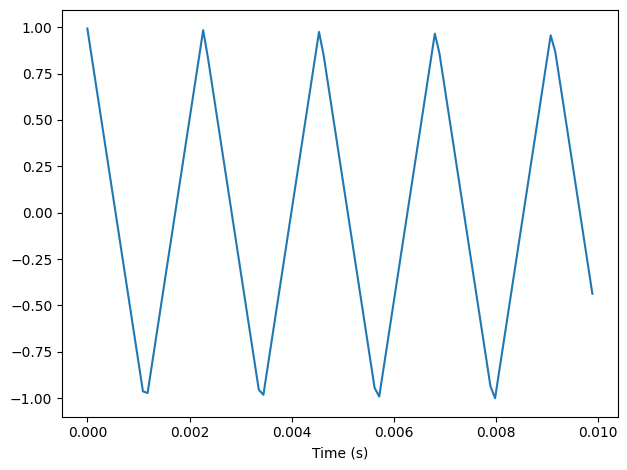

In [34]:
signalTriangle2 = TriangleSignal(440)
waveTriangle2 = signalTriangle2.make_wave(duration = 0.01)
waveTriangle2.plot()
decorate(xlabel='Time (s)')

In [35]:
spectrumTriangle2 = waveTriangle2.make_spectrum()
spectrumTriangle2.hs[0]

(1.0436096431476471e-14+0j)

Действительная часть комплексного числа, она же амплитуда, равна нулю;

Мнимая часть комплексного числа, она же фаза, равна нулю.

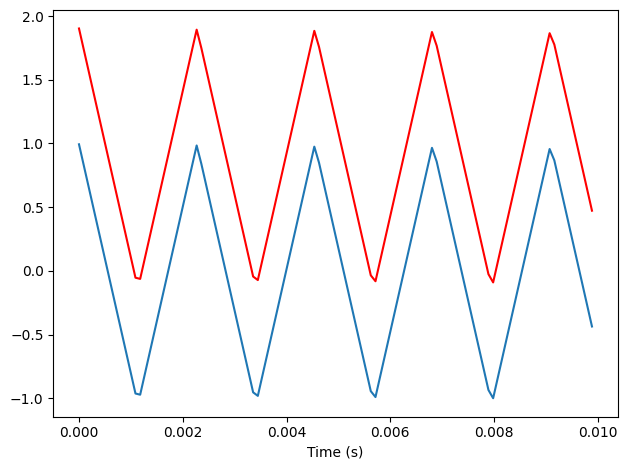

In [36]:
spectrumTriangle2.hs[0] = 100
waveTriangle2.plot()
spectrumTriangle2.make_wave().plot(color = "red")
decorate(xlabel='Time (s)')

По графикам полученных сигналов видно, что задав нулевой компоненте значение 100, весь сигнал получил положительную постоянную составляющую.

Упражнение 2.5

In [37]:
def Change_Spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Спектр пилообразного сигнала:

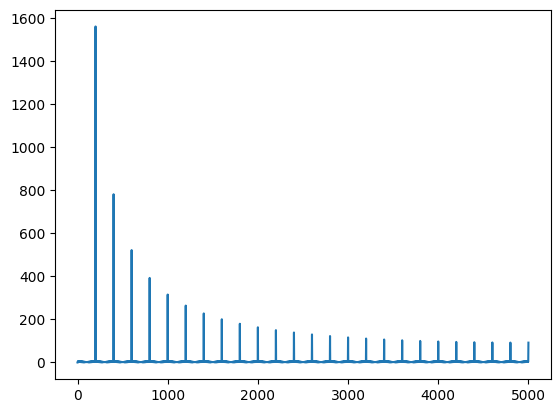

In [38]:
spectrumSawCh = spectrumSaw.copy()
spectrumSawCh.plot()
waveSaw.make_audio()

Измененный спектр пилообразного сигнала:

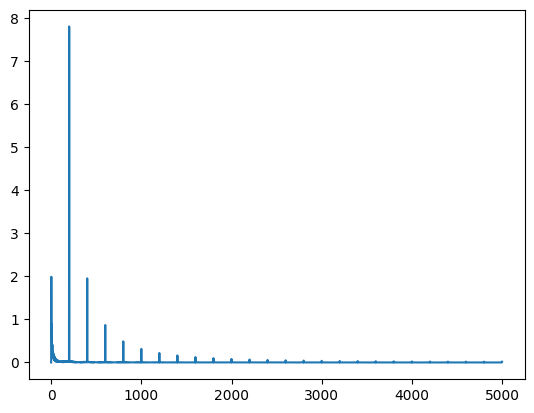

In [39]:
Change_Spectrum(spectrumSawCh)
spectrumSawCh.plot()
waveSawCh = spectrumSawCh.make_wave()
waveSawCh.make_audio()

Спектр треугольного сигнала:

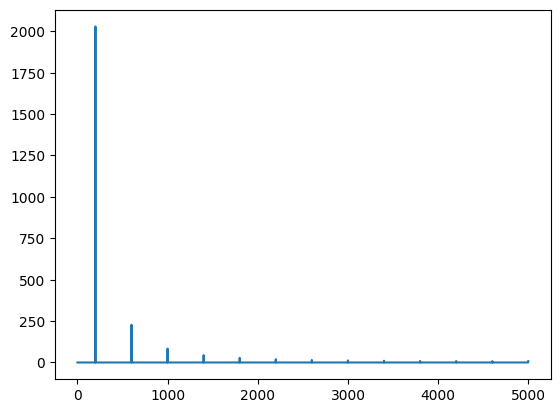

In [40]:
spectrumTriangleCh = spectrumTriangle.copy()
spectrumTriangleCh.plot()
waveTriangle.make_audio()

Измененный спектр треугольного сигнала:

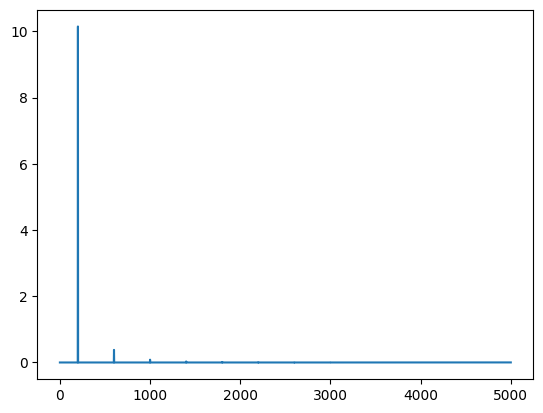

In [41]:
Change_Spectrum(spectrumTriangleCh)
spectrumTriangleCh.plot()
waveTriangleCh = spectrumTriangleCh.make_wave()
waveTriangleCh.make_audio()

Спектр прямоугольного сигнала:

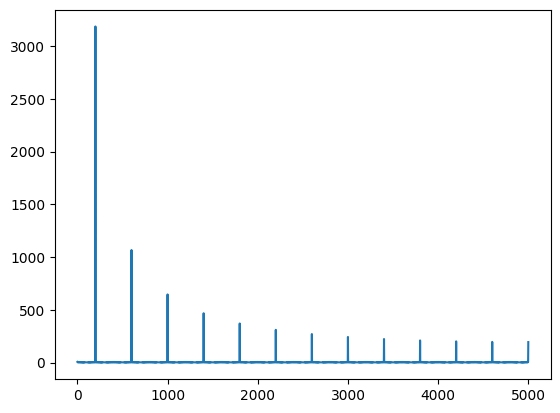

In [42]:
spectrumSquareCh = spectrumSquare.copy()
spectrumSquareCh.plot()
waveSquare.make_audio()

Измененный спектр прямоугольного сигнала:

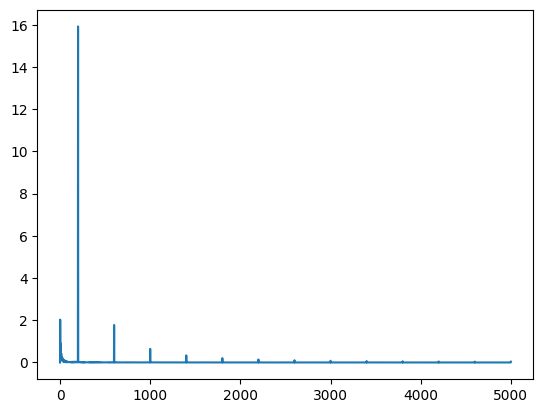

In [43]:
Change_Spectrum(spectrumSquareCh)
spectrumSquareCh.plot()
waveSquareCh = spectrumSquareCh.make_wave()
waveSquareCh.make_audio()

По звукозаписям измененных сигналов слышно, что они стали более "глухими".

Можно сказать, что результат работы написанной функции Change_Spectrum подобен применению фильра низких частот, так как наша функция тем сильнее приглушает гармонику, чем больше её частота.

Упражнение 2.6

Попробуем собрать сигнал, который будет состоять из четных и нечетных гармоник, спадающих обратно пропорционально квадрату частоты, при помощи синусойд.

In [44]:
sinus = []
A = 1
sinus.append(Sinusoid(200, A))
sum = 0
i = 1
while i < 30:
    A = A/(((200 * (i + 1))/(200 * i))**2)
    sinus.append(Sinusoid(200 * (i + 1), A))
    i += 1
for j in sinus:
    sum += j

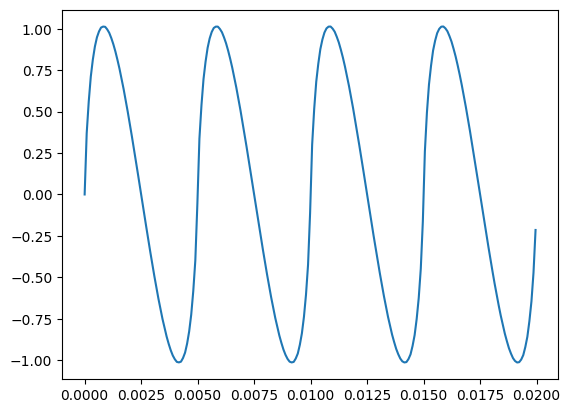

In [47]:
waveSum = sum.make_wave()
waveSum.segment(0, 0.02).plot()
waveSum.make_audio()

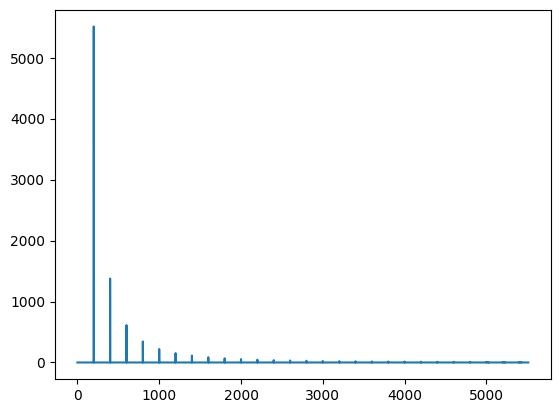

In [48]:
spectrumSum = waveSum.make_spectrum()
spectrumSum.plot()